In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [2]:
df=pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


#  Data Preprocessing

In [3]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.shape

(270, 14)

In [6]:
# Checking for missing values.
df.isnull().values.any()

False

In [7]:
# Checking for imbalanced data based on sex.
df["Sex"].value_counts()

Sex
1    183
0     87
Name: count, dtype: int64

In [8]:
# Checking for imbalanced data based on outcome.
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

<Axes: xlabel='Heart Disease', ylabel='count'>

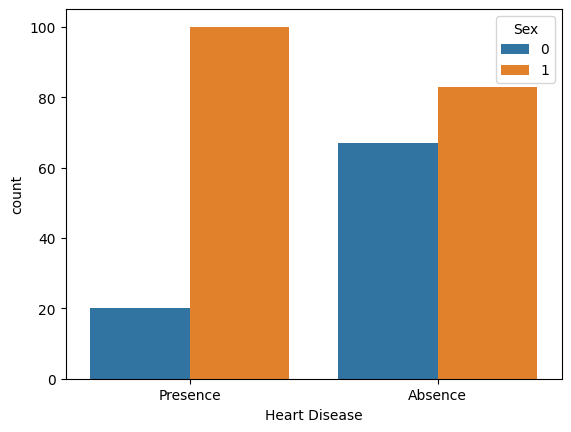

In [9]:
sns.countplot(x=df['Heart Disease'],hue='Sex',data=df)

<Axes: xlabel='Heart Disease', ylabel='count'>

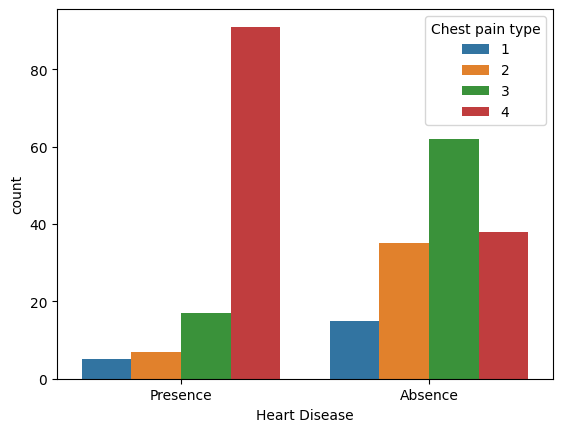

In [10]:
sns.countplot(x=df['Heart Disease'],hue='Chest pain type',data=df)

<Axes: xlabel='Sex', ylabel='count'>

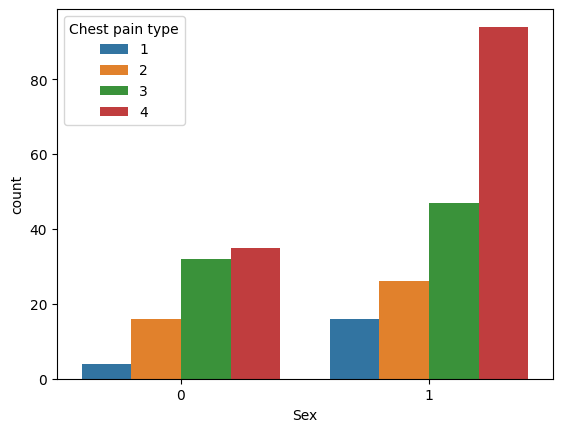

In [11]:
sns.countplot(x=df['Sex'],hue='Chest pain type',data=df)

<Axes: xlabel='Sex', ylabel='BP'>

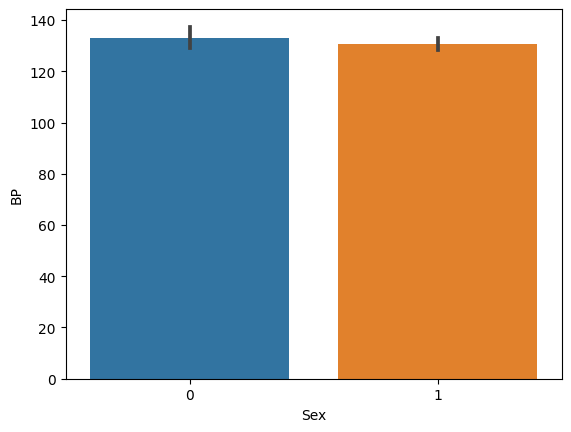

In [12]:
sns.barplot(x=df['Sex'],y=df['BP'],data=df)

<Axes: xlabel='Sex', ylabel='Cholesterol'>

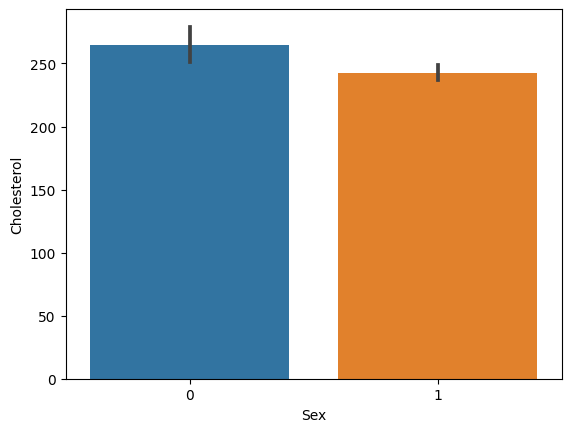

In [13]:
sns.barplot(x=df['Sex'],y=df['Cholesterol'],data=df)

<Axes: xlabel='Heart Disease', ylabel='Cholesterol'>

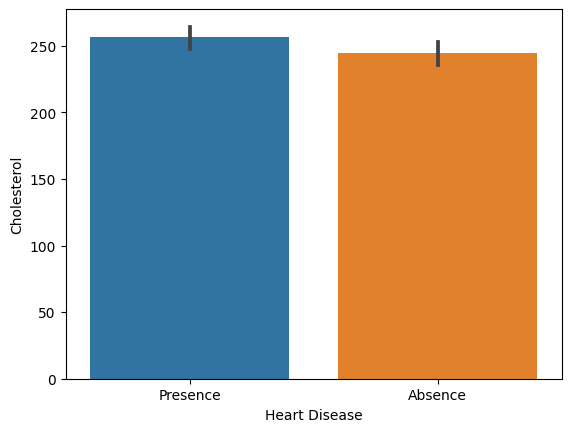

In [14]:
sns.barplot(x=df['Heart Disease'],y=df['Cholesterol'],data=df)

<Axes: xlabel='Heart Disease', ylabel='BP'>

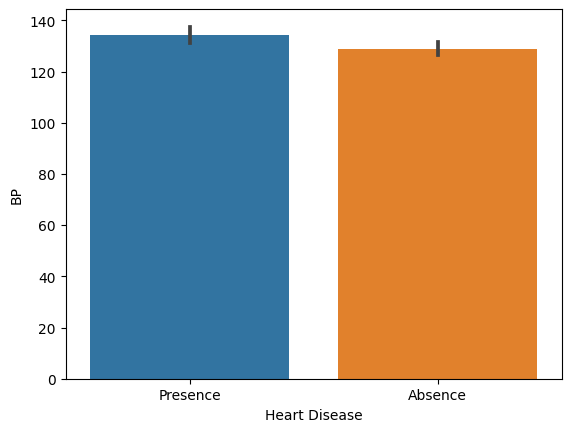

In [15]:
sns.barplot(x=df['Heart Disease'],y=df['BP'],data=df)

<Axes: xlabel='Age', ylabel='BP'>

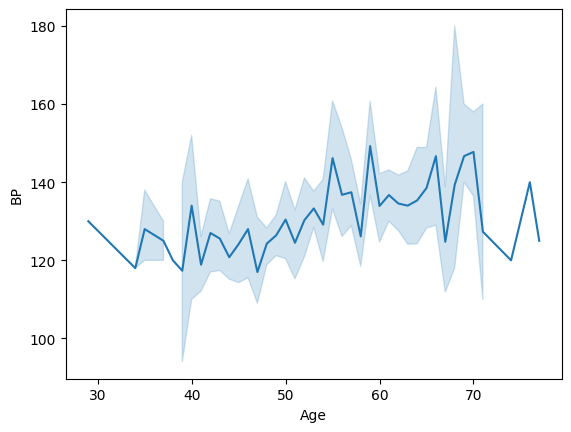

In [16]:
sns.lineplot(x=df['Age'],y=df['BP'],data=df)

<Axes: xlabel='Age', ylabel='Cholesterol'>

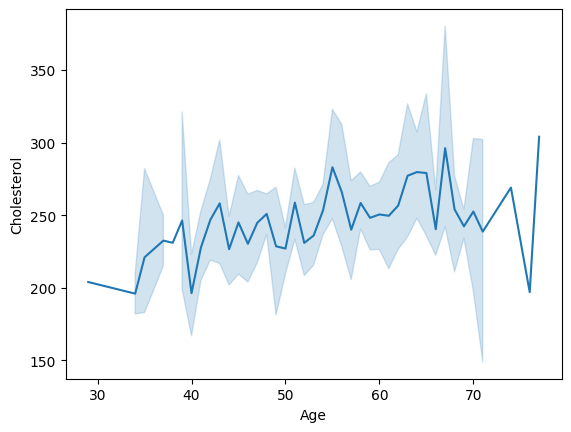

In [17]:
sns.lineplot(x=df['Age'],y=df['Cholesterol'],data=df)

<Axes: xlabel='Age', ylabel='ST depression'>

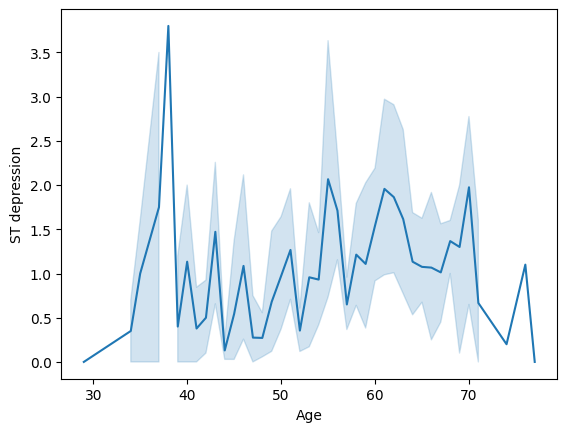

In [18]:
sns.lineplot(x=df['Age'],y=df['ST depression'],data=df)

<Axes: xlabel='Sex', ylabel='ST depression'>

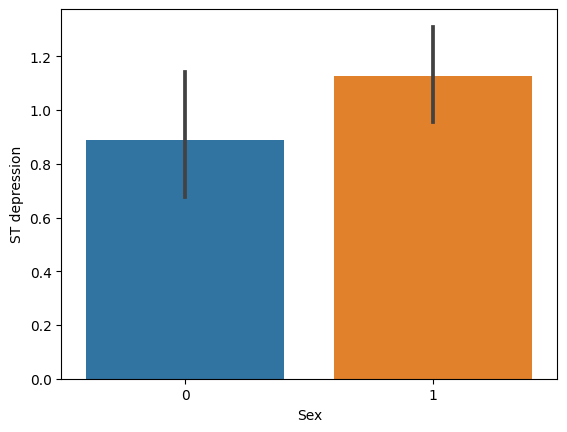

In [19]:
sns.barplot(x=df['Sex'],y=df['ST depression'],data=df)

<Axes: xlabel='Heart Disease', ylabel='Exercise angina'>

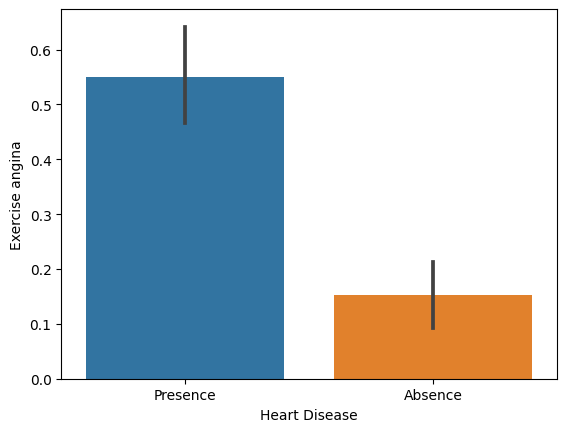

In [20]:
sns.barplot(x=df['Heart Disease'],y=df['Exercise angina'],data=df)

<Axes: xlabel='Sex', ylabel='Exercise angina'>

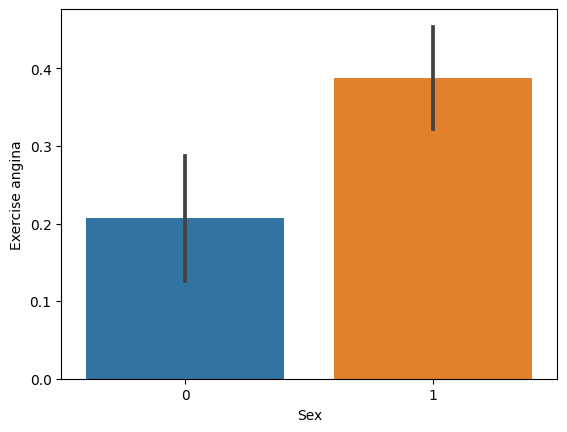

In [21]:
sns.barplot(x=df['Sex'],y=df['Exercise angina'],data=df)

<Axes: xlabel='Heart Disease', ylabel='Number of vessels fluro'>

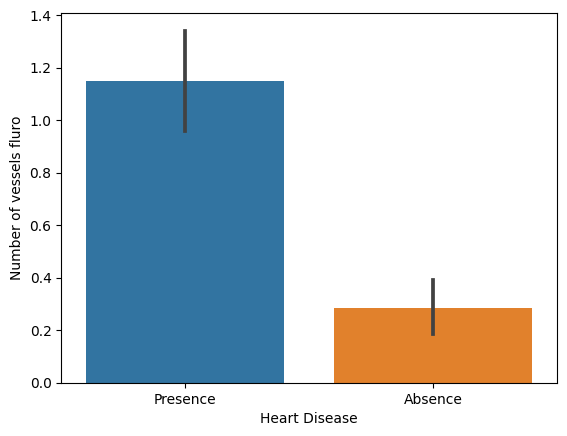

In [22]:
sns.barplot(x=df['Heart Disease'],y=df['Number of vessels fluro'],data=df)

<Axes: xlabel='Heart Disease', ylabel='Thallium'>

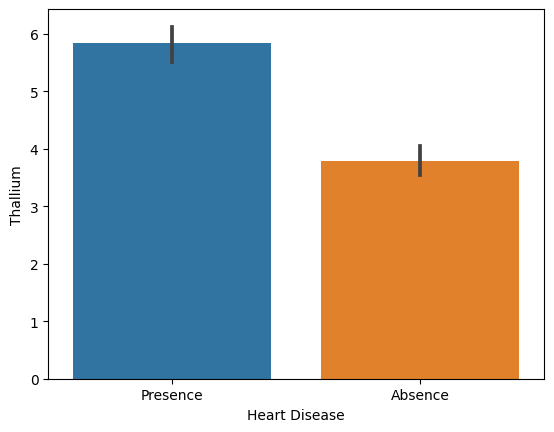

In [23]:
sns.barplot(x=df['Heart Disease'],y=df['Thallium'],data=df)

<Axes: xlabel='Sex', ylabel='FBS over 120'>

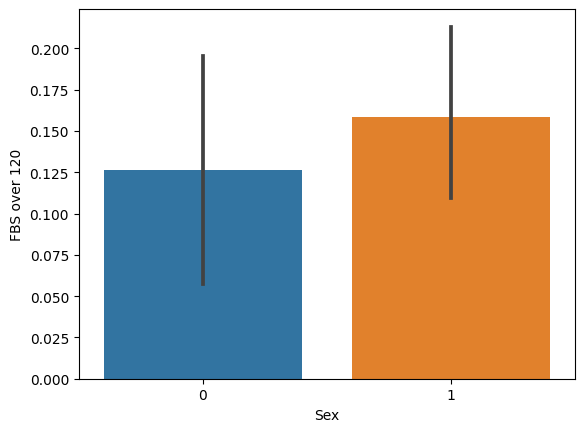

In [24]:
sns.barplot(x=df['Sex'],y=df['FBS over 120'],data=df)

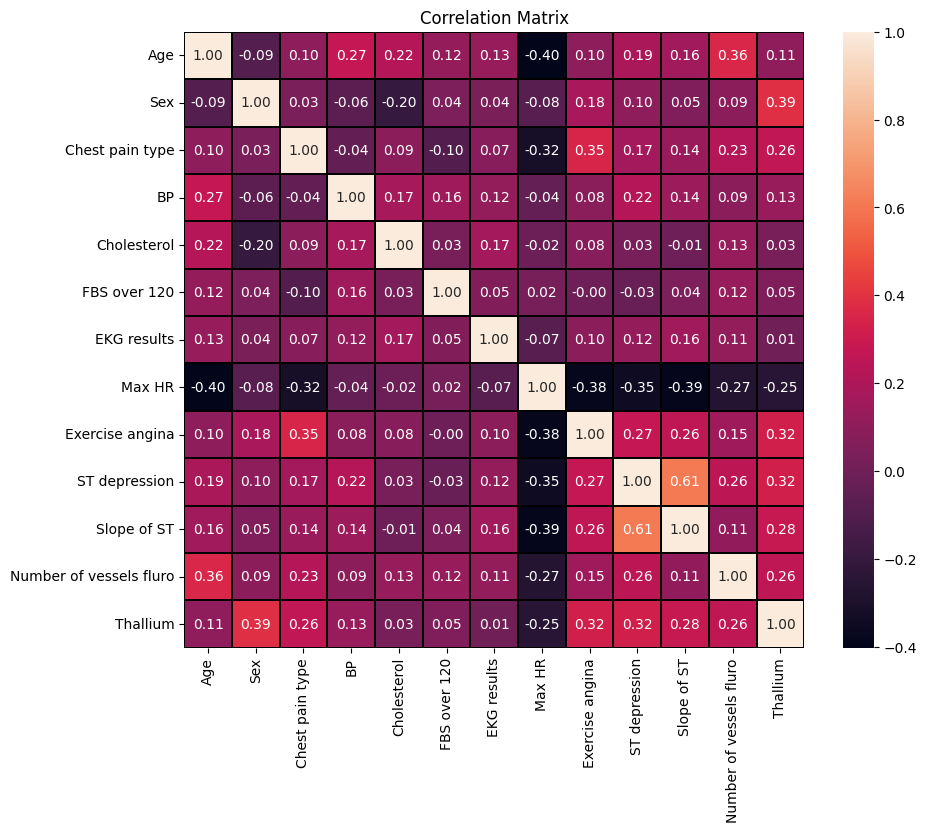

In [54]:
# Create a correlation matrix
correlation_matrix = df.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,linewidths= 0.2, linecolor= 'black', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

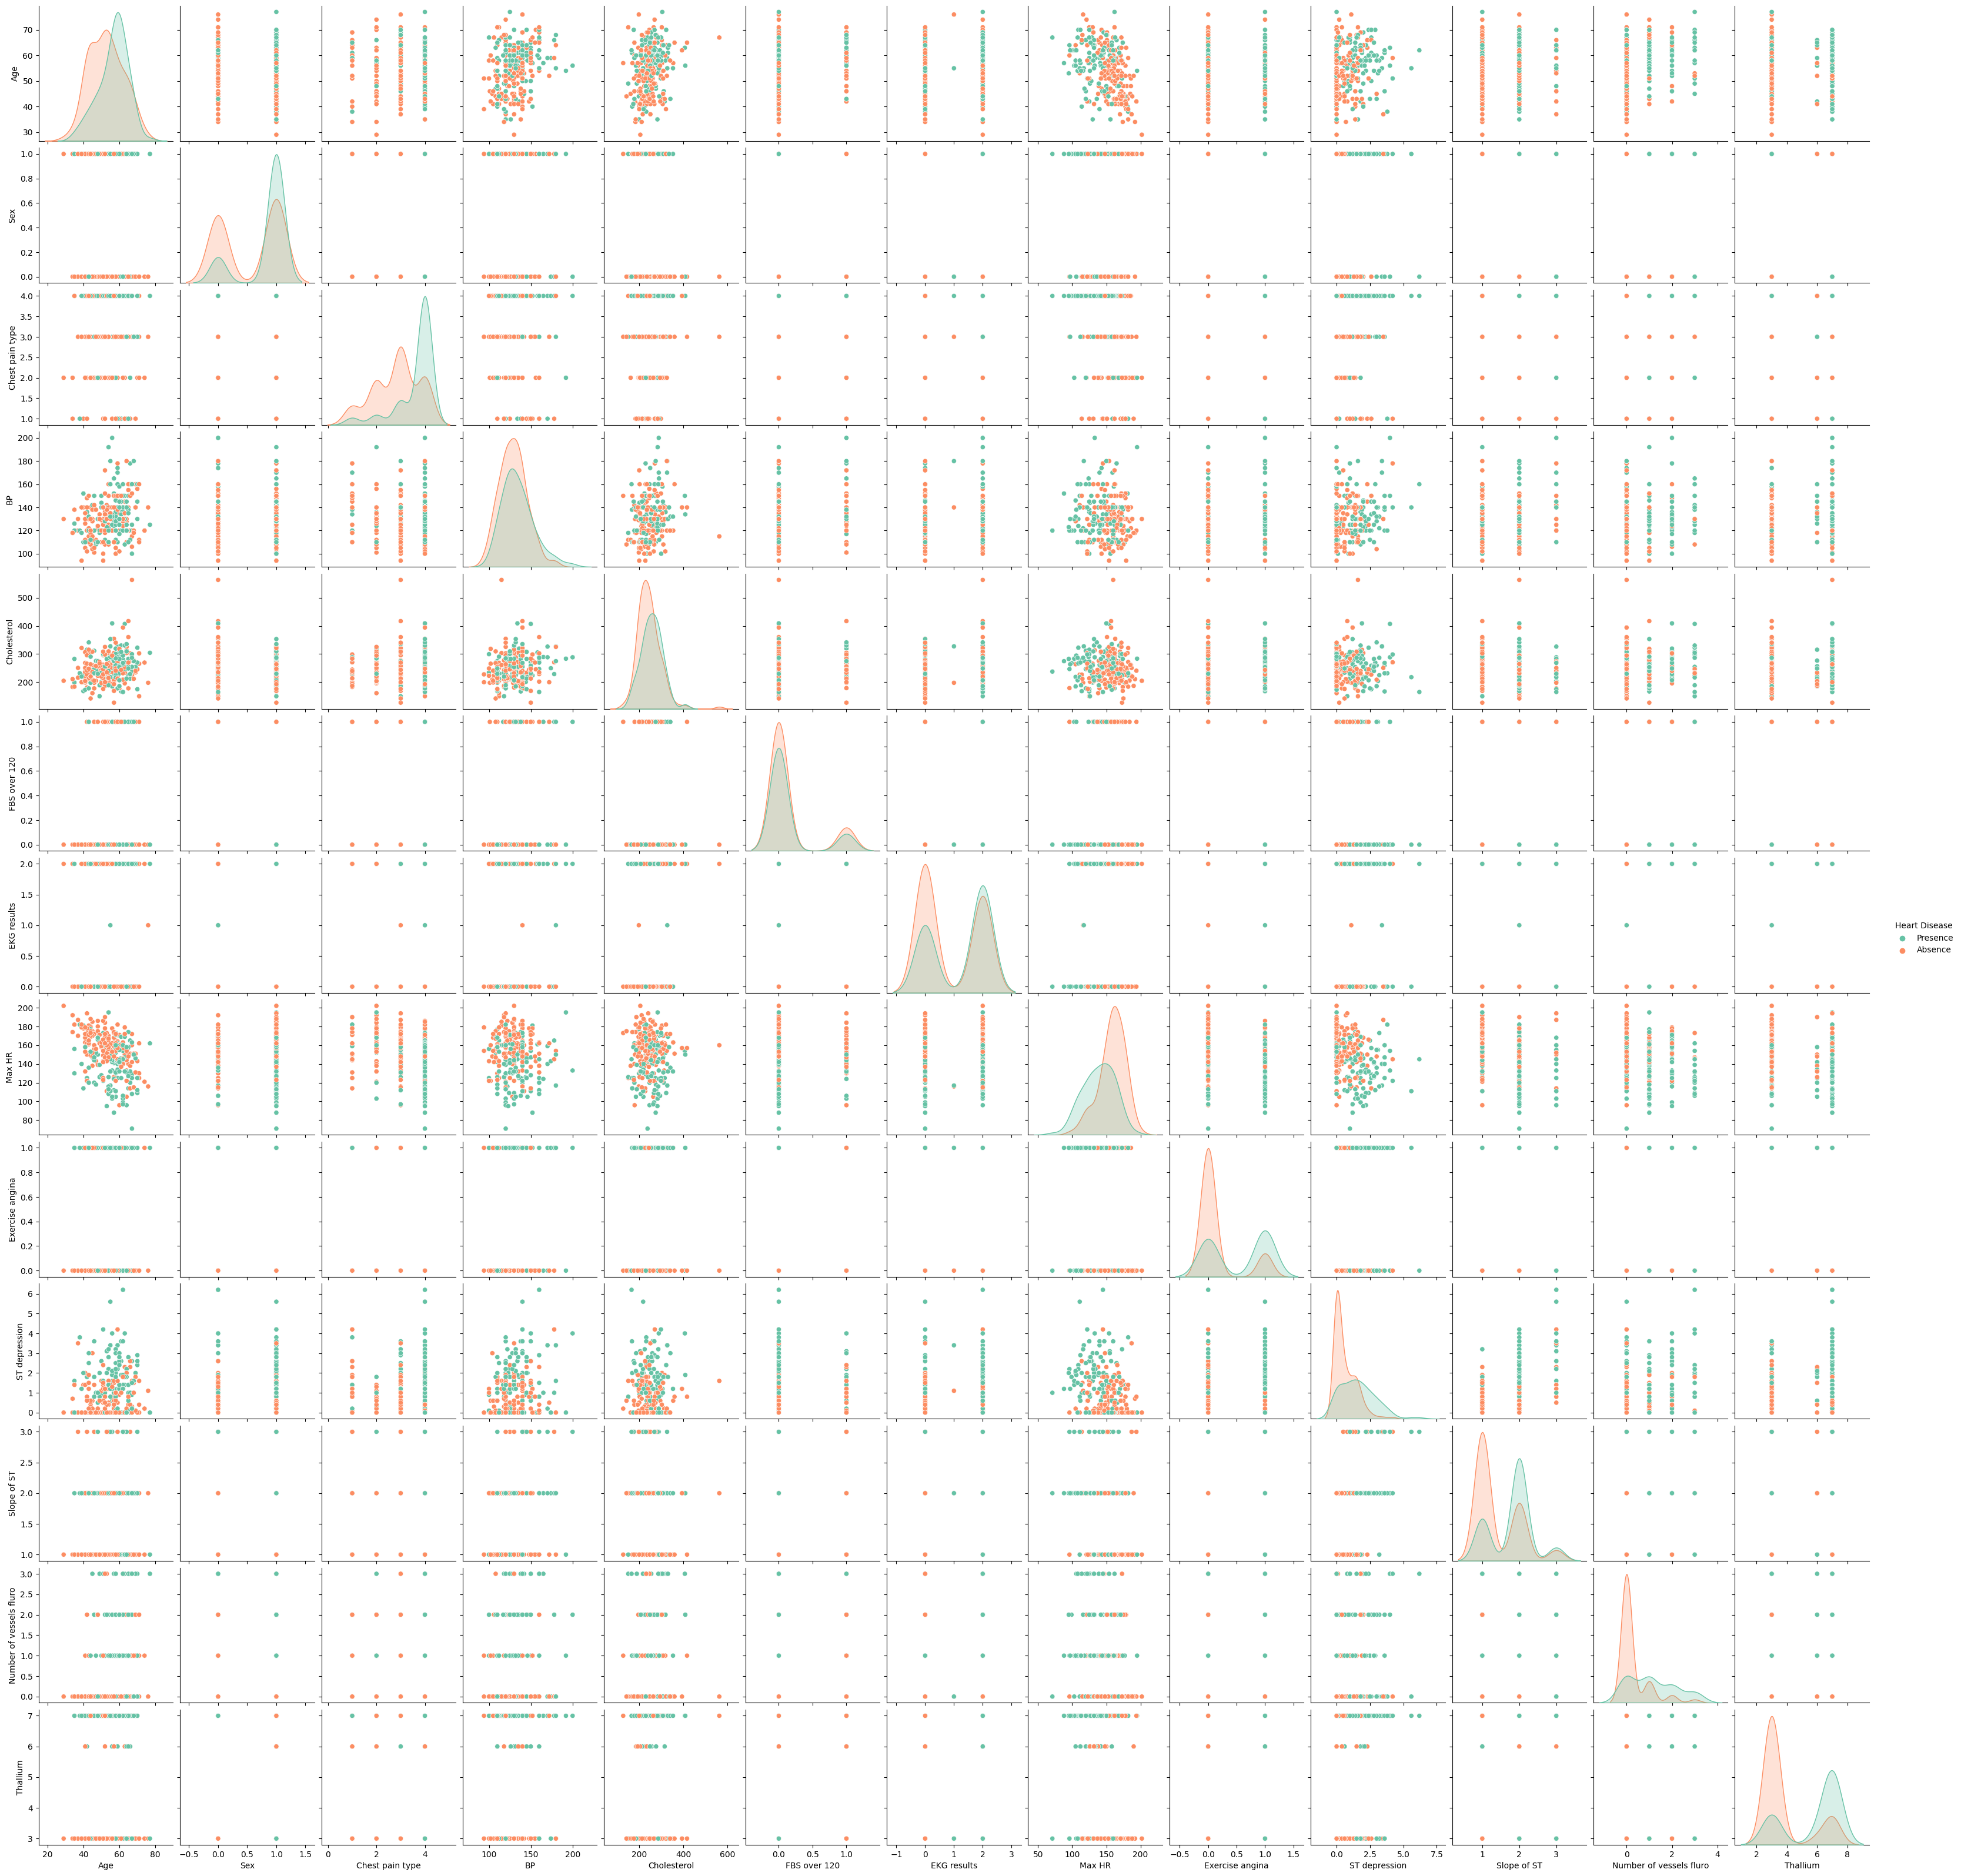

In [26]:
sns.pairplot(df,hue='Heart Disease')

In [27]:
# Data Preprocessing
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

In [28]:
# Convert categorical features to dummy variables 

X = pd.get_dummies(X, columns=['Sex', 'Chest pain type', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium'])


In [29]:
# Split the data into training and testing sets
# Assuming X and y are your features and target variable
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Feature Selection

In [30]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Model Development

In [31]:
# Model Development
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Model Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\n{model}\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\n")


Training Logistic Regression...

LogisticRegression()
Accuracy: 0.8293
Precision: 0.8705
Recall: 0.8293
F1 Score: 0.8217

Training Decision Tree...

DecisionTreeClassifier()
Accuracy: 0.7317
Precision: 0.7417
Recall: 0.7317
F1 Score: 0.7251

Training Random Forest...

RandomForestClassifier()
Accuracy: 0.8537
Precision: 0.8850
Recall: 0.8537
F1 Score: 0.8487

Training Support Vector Machine...

SVC()
Accuracy: 0.8293
Precision: 0.8477
Recall: 0.8293
F1 Score: 0.8250



# Cross-Validation

In [32]:
# Cross-Validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"Cross-validation scores for {name}: {cv_scores}")
    print(f"Average Accuracy: {cv_scores.mean():.4f}\n")


Cross-validation scores for Logistic Regression: [0.75925926 0.83333333 0.90740741 0.85185185 0.90740741]
Average Accuracy: 0.8519

Cross-validation scores for Decision Tree: [0.66666667 0.75925926 0.81481481 0.62962963 0.81481481]
Average Accuracy: 0.7370

Cross-validation scores for Random Forest: [0.75925926 0.83333333 0.85185185 0.77777778 0.85185185]
Average Accuracy: 0.8148

Cross-validation scores for Support Vector Machine: [0.59259259 0.68518519 0.68518519 0.62962963 0.66666667]
Average Accuracy: 0.6519



# Hyperparameter Tuning

In [33]:
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    
    'Random Forest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    
    'Support Vector Machine': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

# Hyperparameter Tuning
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    param_grid = param_grids[name]

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X, y)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Best Parameters: {best_params}")
    print(f"Best Accuracy: {best_score:.4f}\n")


Tuning hyperparameters for Logistic Regression...
Best Parameters: {'C': 1}
Best Accuracy: 0.8519

Tuning hyperparameters for Decision Tree...
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy: 0.7815

Tuning hyperparameters for Random Forest...
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.8519

Tuning hyperparameters for Support Vector Machine...
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Best Accuracy: 0.8481



# Validation and Testing

In [34]:
# Validation and Testing
for name, model in models.items():
    print(f"Testing {name} on validation set...")
    y_val_pred = model.predict(X_val)

    # Model Evaluation on Validation Set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    print(f"\n{model}\nValidation Accuracy: {val_accuracy:.4f}\nValidation Precision: {val_precision:.4f}\nValidation Recall: {val_recall:.4f}\nValidation F1 Score: {val_f1:.4f}\n")

    # Testing
    print(f"Testing {name} on test set...")
    y_test_pred = model.predict(X_test)

    # Model Evaluation on Test Set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    print(f"\n{model}\nTest Accuracy: {test_accuracy:.4f}\nTest Precision: {test_precision:.4f}\nTest Recall: {test_recall:.4f}\nTest F1 Score: {test_f1:.4f}\n")


Testing Logistic Regression on validation set...

LogisticRegression()
Validation Accuracy: 0.3250
Validation Precision: 0.1056
Validation Recall: 0.3250
Validation F1 Score: 0.1594

Testing Logistic Regression on test set...

LogisticRegression()
Test Accuracy: 0.8293
Test Precision: 0.8705
Test Recall: 0.8293
Test F1 Score: 0.8217

Testing Decision Tree on validation set...

DecisionTreeClassifier()
Validation Accuracy: 0.6500
Validation Precision: 0.6812
Validation Recall: 0.6500
Validation F1 Score: 0.6593

Testing Decision Tree on test set...

DecisionTreeClassifier()
Test Accuracy: 0.7317
Test Precision: 0.7417
Test Recall: 0.7317
Test F1 Score: 0.7251

Testing Random Forest on validation set...

RandomForestClassifier()
Validation Accuracy: 0.6000
Validation Precision: 0.6972
Validation Recall: 0.6000
Validation F1 Score: 0.6101

Testing Random Forest on test set...

RandomForestClassifier()
Test Accuracy: 0.8537
Test Precision: 0.8850
Test Recall: 0.8537
Test F1 Score: 0.8487



Testing Logistic Regression on validation set...
Testing Logistic Regression on test set...


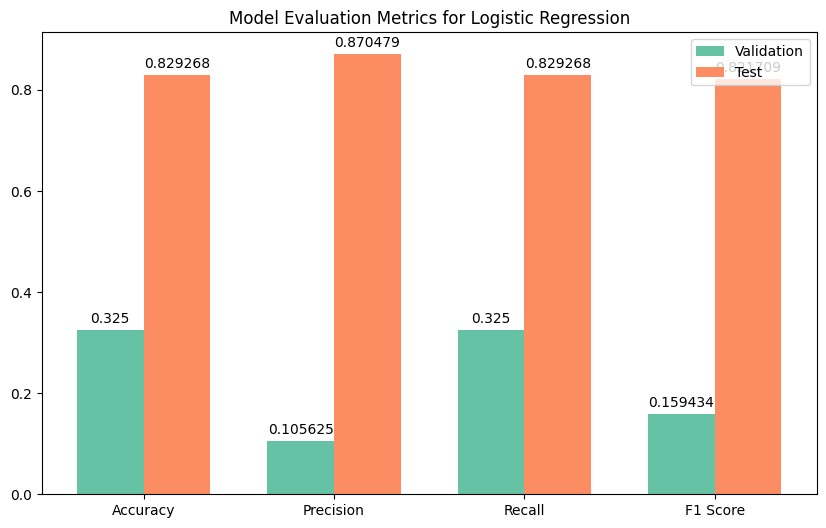

Testing Decision Tree on validation set...
Testing Decision Tree on test set...


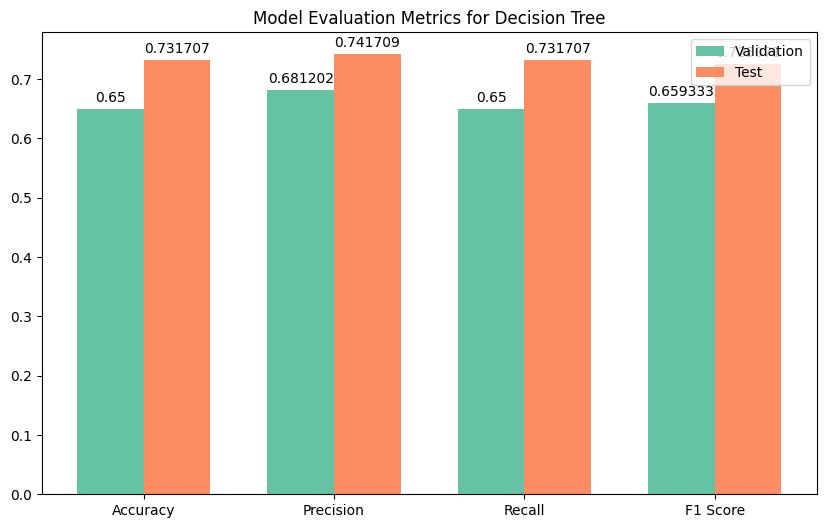

Testing Random Forest on validation set...
Testing Random Forest on test set...


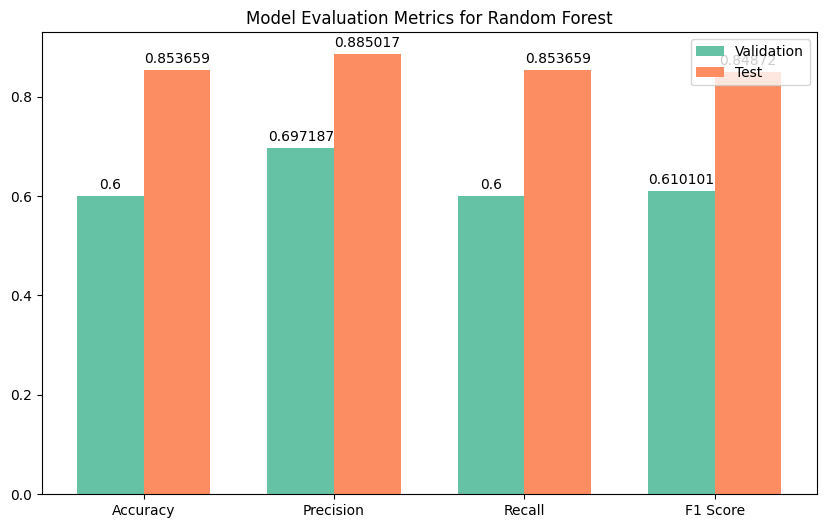

Testing Support Vector Machine on validation set...
Testing Support Vector Machine on test set...


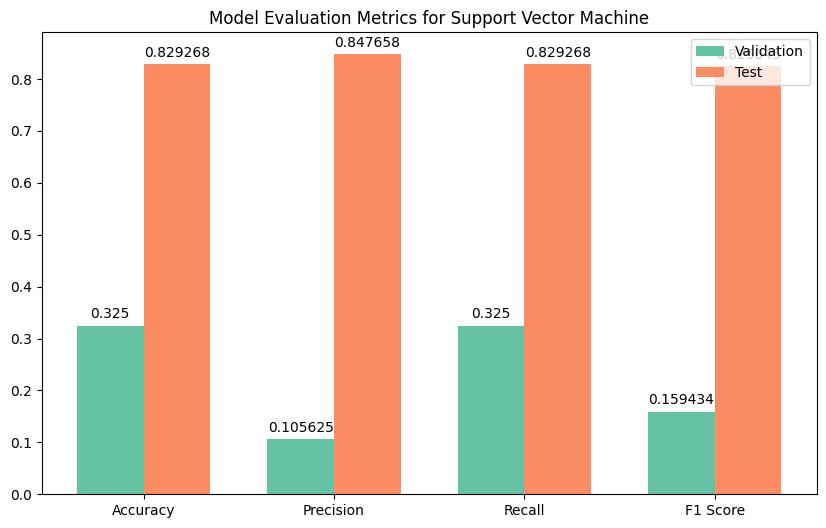

In [35]:
# Validation and Testing
for name, model in models.items():
    print(f"Testing {name} on validation set...")
    y_val_pred = model.predict(X_val)

    # Model Evaluation on Validation Set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')

    # Testing
    print(f"Testing {name} on test set...")
    y_test_pred = model.predict(X_test)

    # Model Evaluation on Test Set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted')
    test_recall = recall_score(y_test, y_test_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Plotting
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    val_scores = [val_accuracy, val_precision, val_recall, val_f1]
    test_scores = [test_accuracy, test_precision, test_recall, test_f1]

    x = np.arange(len(metrics))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x - width/2, val_scores, width, label='Validation')
    rects2 = ax.bar(x + width/2, test_scores, width, label='Test')

    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    plt.title(f'Model Evaluation Metrics for {name}')
    plt.show()


# Model Interpretability

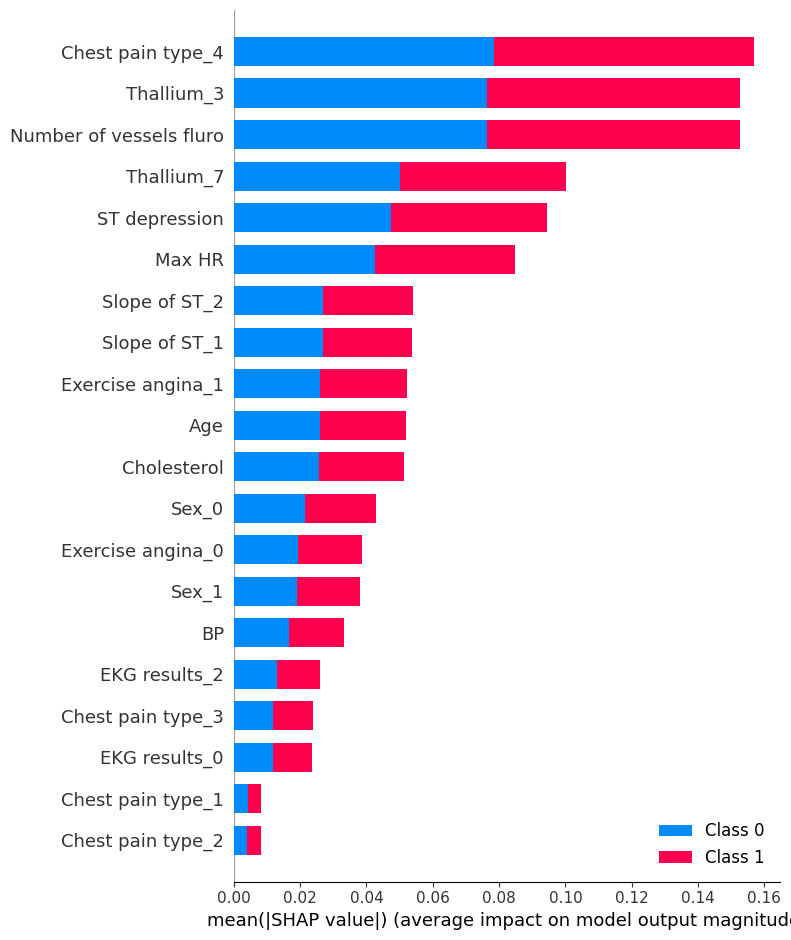

In [36]:
import shap

# Select a model for SHAP values interpretation
model_for_shap = RandomForestClassifier()  

# Train the model on the entire dataset
model_for_shap.fit(X, y)

# Use SHAP values to explain the model predictions
explainer = shap.TreeExplainer(model_for_shap)
shap_values = explainer.shap_values(X)

# Summary Plot for Feature Importance
shap.summary_plot(shap_values, X, feature_names=X.columns, plot_type='bar')

# Individual SHAP Values Plot for a specific instance
instance_index = 1  # Replace with the index of the instance you want to plot
shap.force_plot(explainer.expected_value[1], shap_values[1][instance_index, :], X.iloc[instance_index, :], feature_names=X.columns)
